In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
#Code used for correcting data 

#>> correcting data
# data_frame['Cholesterol'] = data_frame['Cholesterol'].replace(0,np.NaN)
# mean=int(data_frame['Cholesterol'].mean(skipna=True))
# data_frame['Cholesterol'] ] data_frame['Cholesterol'].replace(np.NaN,mean)
#--there was some null values so we set em to the average

#>> manipulating categorial data
# data_frame['Sex'] = data_frame['Sex'].apply(lambda x : 1 if x == 'M' else 0)
# data_frame['ExerciseAngina'] = data_frame['ExerciseAngina'].apply(lambda x : 1 if x == 'Y' else 0)
#>> Overwritting data
# data_frame.to_csv("heart.csv", index=False)
# data_frame.describe()

#-------------------------------------------------------------------------------------------------------------------------------
#>> Splitting Data
#xTrain, xTest, yTrain, yTest = train_test_split(modified_x, y, test_size = 0.2, random_state = 42)

#-------------------------------------------------------------------------------------------------------------------------------
#>> KNN Model Implementation :

# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import f1_score

# sc_x = StandardScaler()
# x_train_KNN = sc_x.fit_transform(xTrain)
# x_test_KNN = sc_x.fit_transform(xTest)
# classifier = KNeighborsClassifier(n_neighbors=13 ,p=2,metric='euclidean')
# classifier.fit(x_train_KNN,yTrain)
#>> Saving model
#joblib.dump(classifier,'KNN Model.joblib')
#>> Predicating and saving accuracy
# y_pred = classifier.predict(x_test_KNN)
# print(f1_score(yTest,y_pred))
# print(accuracy_score(yTest,y_pred))
#-------------------------------------------------------------------------------------------------------------------------------
#--Decision tree model implementation
#>> Creating model 
# decision_tree =DecisionTreeClassifier()
# decision_tree.fit(xTrain,yTrain)

#>>Accuracy score
# dtPredictions=decision_tree.predict(xTest)
# accuracy_score(yTest , dtPredictions)
#-------------------------------------------------------------------------------------------------------------------------------
#>> linear Regression
# LR = LinearRegression()
# LR.fit(xTrain,yTrain)
#>> Predicating values
# yPrediction  =  LR.predict(xTest)
# yPrediction 
#>> accuracy score 
# score=r2_score(yTest,yPrediction )
# print('r squared is : ',score)
# print('Mean squared eror is : ',mean_squared_error(yTest,yPrediction ))
# print('Root mean squared error is : ',np.sqrt(mean_squared_error(yTest,yPrediction )))

In [4]:
#Importing libs and csv file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections
import statistics as stat
import joblib

#scikit-learn lib for linear regression and splitting test/model data
from sklearn.model_selection import train_test_split   #Splitting data 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from collections import Counter

#reading csv file
data_frame =pd.read_csv('heart.csv')
data_frame2 =pd.read_csv('heart.csv')


In [5]:
#Spliting DataSet

#x with categorical data which we cant deal with
x = data_frame.drop('HeartDisease',axis=1)
#y only helds Heart Disease
y = data_frame.HeartDisease
#modified x terminates all categorical data and make 'dummies'-you may google this-
modified_x = pd.get_dummies(x)
modified_x.to_csv("meow.csv", index=False)

#Drawing functions definitions ~Nour
#####################################################################################################################
def draw_bar_chart(my_plt, x_axis, y_axis, x_label):
    my_plt.bar(x_axis, y_axis, color='#ffa9a8', width=0.7, label=x_label, edgecolor="#ffea94")
    my_plt.xlabel(x_label)
    my_plt.ylabel('Number of people')
    my_plt.title("Number of people have " + x_label)
    my_plt.legend()
    my_plt.show()

def draw_pie_chart(my_plt, labels, frequency, title):
    color = ["#ffa9a8", "#ffea94", "#a5cbef", "#5cc0bb"]
    my_plt.pie(frequency, labels=labels, autopct="%.1f%%", colors=color, shadow=True)
    my_plt.title("Number of people have " + title)
    my_plt.legend(title=title)
    my_plt.show()

def draw_histogram(my_plt, my_data, title):
    x_axis = my_data.loc[:, title]
    median = x_axis.median()
    mean = x_axis.mean()
    mode = stat.mode(x_axis)

    my_plt.hist(x_axis, edgecolor='#ffea94', color='#ffa9a8')
    my_plt.axvline(median, color='#d9534f', label='median', linewidth=3)
    my_plt.axvline(mean, color='#41b6e6', label='mean', linewidth=3)
    my_plt.axvline(mode, color='#96ceb4', label='moda', linewidth=3)

    my_plt.xlabel(title)
    my_plt.title("Number of people have " + title)
    my_plt.legend()
    my_plt.show()

def draw_boxplot(my_plt, my_data, title):
    x_axis = my_data.loc[:, title]
    my_plt.boxplot(x_axis, vert=False, showmeans=True, meanline=True)

    my_plt.title("Box plot for " + title)
    my_plt.xlabel(title)
    my_plt.show()

def draw_scatter_plot(my_data, my_plt, x_axis, y_axis):
    my_plt.scatter(my_data[x_axis], my_data[y_axis])
    my_plt.xlabel(x_axis)
    my_plt.ylabel(y_axis)
    my_plt.title("Scatter plot to show relation between " + x_axis + " and " + y_axis)
    my_plt.show()

def calculate_frequency_and_draw(my_data, my_plt, x_label):

    column_data = []  # to add data
    x_axis = []  # to set data for x-axis
    y_axis = []  # to set data for y-axis

    for i in my_data[x_label]:
        column_data.append(i)

    main_data = collections.Counter(column_data)  # to count how many times number appear
    for value, frequency in main_data.items():
        x_axis.append(value)
        y_axis.append(frequency)
    draw_bar_chart(my_plt, x_axis, y_axis, x_label)
    draw_pie_chart(my_plt, x_axis, y_axis, x_label)


def calculate_IQR(data):
    q3, q1 = np.percentile(data, [75, 25])
    IQR = q3-q1
    return IQR


def calculate_central_tendency_and_dispersion(all_data, data_col):
    my_central_tendency = all_data.loc[:, data_col]

    mean = my_central_tendency.mean()
    median = my_central_tendency.median()
    mode = stat.multimode(my_central_tendency)

    print("********** Central Tendency For " + data_col + " **********\n")
    print("The mean of " + data_col + " is "+str(mean))
    print("The median of " + data_col + " is "+str(median))
    print("The mode of " + data_col + " is " + str(mode)+"\n")

    if len(mode) == 2:
        print("The distribution shape is BIMODAL")
    else:
        if mode[0] < median:
            print("The distribution shape is POSITIVE SKEWNESS")
        elif mode[0] > median:
            print("The distribution shape is NEGATIVE SKEWNESS")
        else:
            print("The distribution shape is NORMAL DISTRIBUTION")

            print("\n************************************************************************\n")
    print("********** Dispersion For " + data_col + " **********\n")
    print("The variance of " + data_col + " is "+str(my_central_tendency.var()))
    print("The standard deviation of " + data_col + " is "+str(my_central_tendency.std()))
    print("The Range of data : ")
    print("\nMinimum Value = " + str(min(my_central_tendency)))
    print("Maximum Value = " + str(max(my_central_tendency)))
    print("\nThe IQR of " + data_col + " is "+str(calculate_IQR(my_central_tendency)))

#####################################################################################################################



In [13]:
data_frame.describe()

,HeartDisease,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Age
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.553377,0.789760,132.396514,244.628758,0.233115,136.809368,0.404139,0.887364,53.510893
std,0.497414,0.407701,18.514154,53.318031,0.423046,25.460334,0.490992,1.066570,9.432617
min,0.000000,0.000000,0.000000,85.000000,0.000000,60.000000,0.000000,-2.600000,28.000000
25%,0.000000,1.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,47.000000
50%,1.000000,1.000000,130.000000,244.600000,0.000000,138.000000,0.000000,0.600000,54.000000
75%,1.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,60.000000
max,1.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,77.000000


Skewness >>  
-0.14435941846180994


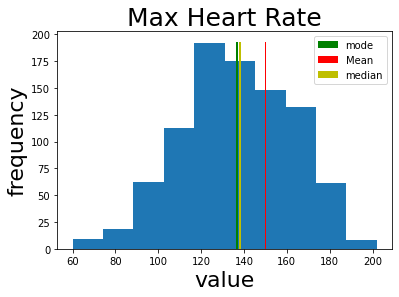

In [14]:
#Plotting Max heart rate ~my code
plt.hist(data_frame['MaxHR'])
plt.bar(data_frame['MaxHR'].mean(),height=193,color='g',label='mode')
plt.bar(data_frame['MaxHR'].mode(),height=193,color='r',label='Mean')
plt.bar(data_frame['MaxHR'].median(),height=193,color='y',label='median')
plt.legend()
plt.xlabel('value',size=22)
plt.ylabel('frequency',size=22)
plt.title('Max Heart Rate',size=25)
plt.show
print('Skewness >>  ' )
print(data_frame['MaxHR'].skew())
# Histogram Shape : Negatively Skewed

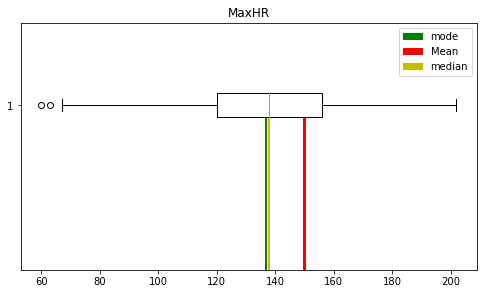

In [15]:
#ploting max hr as a box plot ~my code
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.title('MaxHR')
plt.boxplot(data_frame['MaxHR'],vert=False)
plt.bar(data_frame['MaxHR'].mean(),height=0.93,color='g',label='mode')
plt.bar(data_frame['MaxHR'].mode(),height=0.93,color='r',label='Mean')
plt.bar(data_frame['MaxHR'].median(),height=0.93,color='y',label='median')
plt.legend()
plt.show()

Text(0.5, 0, 'Excercise Angina')

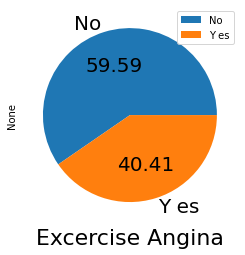

In [16]:
##Plotting Exercise Angina ~my code
data_frame.groupby('ExerciseAngina').size().plot(kind='pie',
                                         autopct='%.2f',
                                         textprops={'fontsize': 20},
                                         labels=['No','Y es'],
                                         legend=True).set_xlabel('Excercise Angina', size=22)


Text(0.5, 0, 'Heart Diseases')

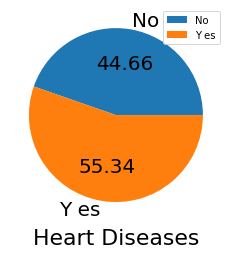

In [17]:
#Plotting Heart Disease ~my code
data_frame.groupby('HeartDisease').size().plot(kind='pie',
                                       autopct='%.2f',
                                       textprops={'fontsize': 20},
                                       label='',
                                       labels=['No','Y es'],
                                       legend=True).set_xlabel('Heart Diseases', size=22)


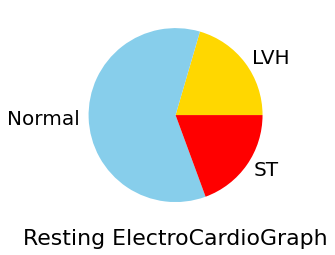

In [18]:
#Plotting Resting ElectroCardioGraph ~Samy's code with a bit of modification 'removed none from y axis and some unnecessery things i did not understand xd'

data_frame.groupby('RestingECG').size().plot( kind='pie', textprops={'fontsize': 20},
                                  colors=['gold' , 'skyblue','red' ],ylabel='').set_xlabel('Resting ElectroCardioGraph', size=22)
plt.show()


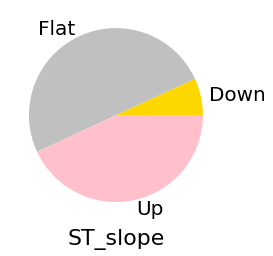

In [19]:
#Plotting Resting ElectroCardioGraph ~Samy's code 'renamed xlabel , weird colors tho'
data_frame.groupby('ST_Slope').size().plot( kind='pie', textprops={'fontsize': 20},
                                  colors=['gold' , 'silver' ,'pink'],
                                  ylabel='').set_xlabel('ST_slope', size=22)
plt.show()


						Oldpeak


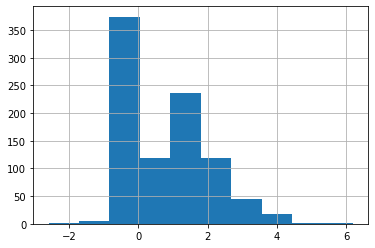

In [20]:
#Plotting Oldpeak ~Samy's code 'Porfecto'
data_frame.Oldpeak.hist()
print('\t\t\t\t\t\tOldpeak')
plt.show()
# Histogram Shape : Spiked

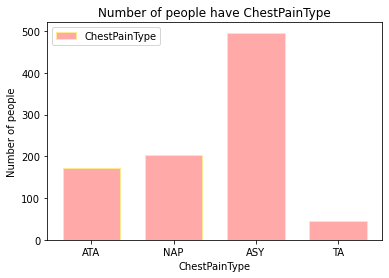

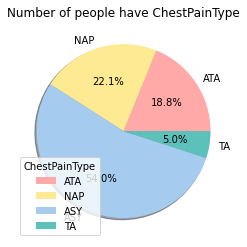

In [21]:
calculate_frequency_and_draw(data_frame, plt, "ChestPainType")


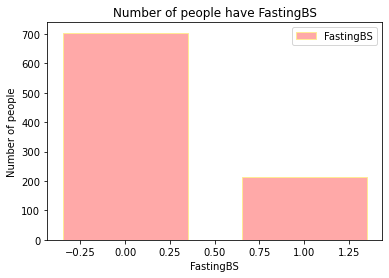

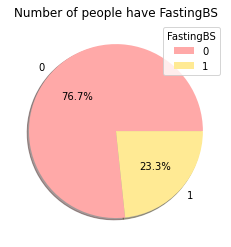

In [22]:
calculate_frequency_and_draw(data_frame, plt, "FastingBS")


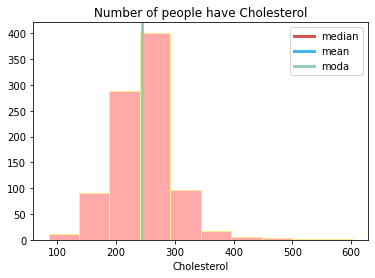

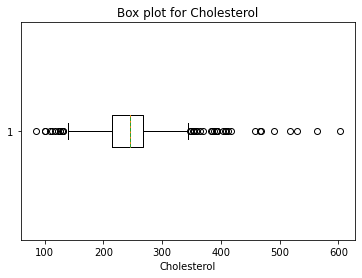

In [23]:
draw_histogram(plt, data_frame, "Cholesterol")
draw_boxplot(plt, data_frame, "Cholesterol")


In [6]:
calculate_central_tendency_and_dispersion(data_frame, "Cholesterol")


********** Central Tendency For Cholesterol **********

The mean of Cholesterol is 244.62875816993574
The median of Cholesterol is 244.6
The mode of Cholesterol is [244.6]

The distribution shape is NORMAL DISTRIBUTION

************************************************************************

********** Dispersion For Cholesterol **********

The variance of Cholesterol is 2842.8124326982756
The standard deviation of Cholesterol is 53.31803102795784
The Range of data : 

Minimum Value = 85.0
Maximum Value = 603.0

The IQR of Cholesterol is 53.0


<function matplotlib.pyplot.show(close=None, block=None)>

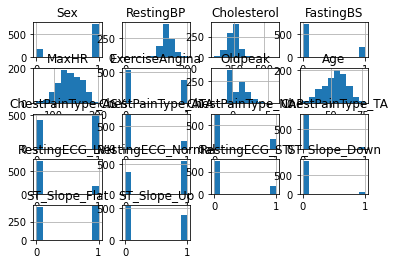

In [25]:
#Ploting the whole modified dataset ~My code
modified_x.hist()
plt.show

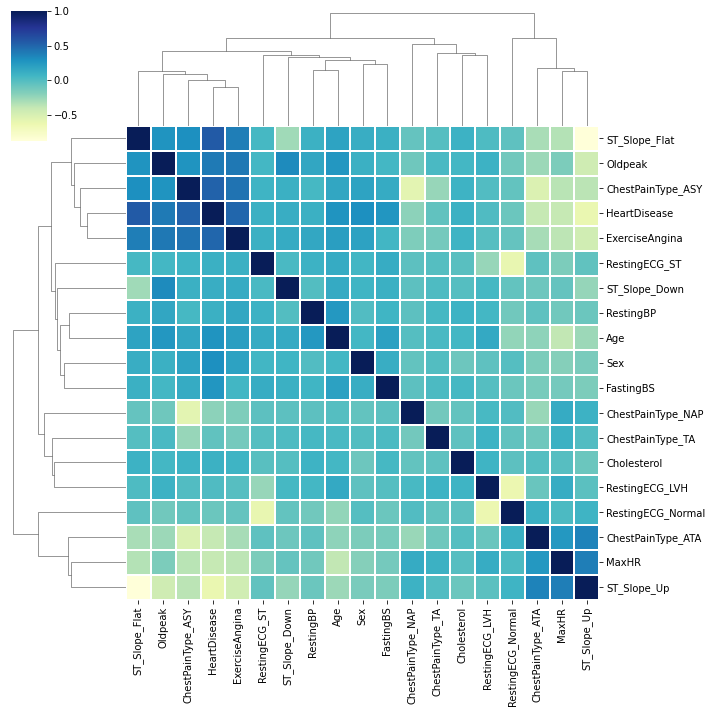

In [28]:
correlations =pd.get_dummies(data_frame2)
corrmat = correlations.corr()
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
  
cg

In [29]:
correlations =pd.get_dummies(data_frame2)
correlations.corr()
 

,HeartDisease,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Age,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
HeartDisease,1.000000,0.305445,0.107589,0.093989,0.267291,-0.400421,0.494282,0.403951,0.282039,0.516716,-0.401924,-0.212964,-0.054790,0.010670,-0.091580,0.102527,0.122527,0.554134,-0.622164
Sex,0.305445,1.000000,0.005133,-0.101750,0.120076,-0.189186,0.190664,0.105734,0.055750,0.183876,-0.161522,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,0.066036,0.116077,-0.150942
RestingBP,0.107589,0.005133,1.000000,0.080742,0.070193,-0.112135,0.155101,0.164803,0.254399,0.048824,-0.046153,-0.041348,0.049855,0.053166,-0.116851,0.090447,-0.007912,0.099207,-0.096146
Cholesterol,0.093989,-0.101750,0.080742,1.000000,0.042925,-0.017166,0.077528,0.053036,0.053337,0.084485,-0.015241,-0.062222,-0.047310,0.075526,-0.042412,-0.024566,-0.008944,0.093598,-0.089954
FastingBS,0.267291,0.120076,0.070193,0.042925,1.000000,-0.131438,0.060451,0.052698,0.198039,0.131176,-0.140514,-0.039249,0.026885,-0.011656,-0.093028,0.127110,0.105102,0.107006,-0.161730
MaxHR,-0.400421,-0.189186,-0.112135,-0.017166,-0.131438,1.000000,-0.370425,-0.160691,-0.382045,-0.354963,0.253735,0.134580,0.100025,0.125793,0.023801,-0.157879,-0.073316,-0.342581,0.383397
ExerciseAngina,0.494282,0.190664,0.155101,0.077528,0.060451,-0.370425,1.000000,0.408752,0.215793,0.430034,-0.300365,-0.166030,-0.128105,-0.016382,-0.072924,0.107036,0.136439,0.382237,-0.455676
Oldpeak,0.403951,0.105734,0.164803,0.053036,0.052698,-0.160691,0.408752,1.000000,0.258612,0.280026,-0.262124,-0.106212,0.032231,0.086794,-0.116719,0.055958,0.322130,0.283295,-0.450577
Age,0.282039,0.055750,0.254399,0.053337,0.198039,-0.382045,0.215793,0.258612,1.000000,0.166607,-0.218165,-0.011335,0.032042,0.145727,-0.230566,0.136798,0.138397,0.185568,-0.258067
ChestPainType_ASY,0.516716,0.183876,0.048824,0.084485,0.131176,-0.354963,0.430034,0.280026,0.166607,1.000000,-0.522432,-0.577670,-0.249003,0.002289,-0.063606,0.076438,0.103407,0.303645,-0.359443


In [81]:
from sklearn.preprocessing import StandardScaler
import math
sc_x = StandardScaler()
#Training and testing data
xTrain, xTest, yTrain, yTest = train_test_split(modified_x, y, test_size = 0.2, random_state = 42)

meow = pd.read_csv('meow.csv')

#loading models
linear_regression_model = joblib.load('Linear Regression Model.joblib')

#Accuracy(about 55%) poor
decision_tree_model = joblib.load('DecisionTreeModel.joblib')
#Accuracy(about 80~85%) Excellent

KNN_model = joblib.load('KNN Model.joblib')
#Accuracy 85%

#Decision Tree trial code
dtPredictions=decision_tree_model.predict(meow)
print('Decision Tree >>')
print(dtPredictions[0])

#KNN Trial Code >
x_test_KNN = sc_x.fit_transform(meow)
y_pred = KNN_model.predict(x_test_KNN)
print('KNN >>')
print(y_pred[0])

#Linear Regression
lrpred = linear_regression_model.predict(meow)
print('Linear Regression >>')
print(round(lrpred[0]))

Decision Tree >>
1
KNN >>
1
Linear Regression >>
1
